### **Sales Analysis**

Importing libraries

In [2]:
import pandas as pd
import os

**Load data of each month and Merge data from each month into one CSV**


In [4]:
df1 = pd.read_csv(r'/content/Sales_January_2019.csv')
df2 = pd.read_csv(r'/content/Sales_February_2019.csv')
df3 = pd.read_csv(r'/content/Sales_March_2019.csv')
df4 = pd.read_csv(r'/content/Sales_April_2019.csv')
df5 = pd.read_csv(r'/content/Sales_May_2019.csv')
df6 = pd.read_csv(r'/content/Sales_June_2019.csv')
df7 = pd.read_csv(r'/content/Sales_July_2019.csv')
df8 = pd.read_csv(r'/content/Sales_August_2019.csv')
df9 = pd.read_csv(r'/content/Sales_September_2019.csv')
df10 = pd.read_csv(r'/content/Sales_October_2019.csv')
df11 = pd.read_csv(r'/content/Sales_November_2019.csv')
df12 = pd.read_csv(r'/content/Sales_December_2019.csv')

df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12])

df.to_csv('all_months_data.csv',index = False)

In [6]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [7]:
df.describe()
df.shape

(186850, 6)

# Read In Updated Dataframe

In [8]:
df = pd.read_csv('all_months_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"



**Cleaning Our data**

Drop rows of NAN

In [9]:
# finding NaN values
nan_df = df[df.isna().any(axis=1)]
nan_df.head()

df = df.dropna(how = 'all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


Removing text in order date column

In [12]:
df = df[df['Month'].str[0:2] != 'Or']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",700.00,01
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",14.95,01
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",23.98,01
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",149.99,01
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",11.99,01
...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1.0,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",14.95,12
186846,319667,AA Batteries (4-pack),2.0,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",7.68,12
186847,319668,Vareebadd Phone,1.0,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",400.00,12
186848,319669,Wired Headphones,1.0,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",11.99,12


In [ ]:
df.isnull().sum()

,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0


# Augment data with additional columns



Convert columns to correct data types

In [10]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors = 'coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'],errors = 'coerce')


df['Sales'] = df['Quantity Ordered']*df['Price Each']
df['Sales'] = pd.to_numeric(df['Sales'])


# Another method: df['Price Each'] = df['Price Each'].astype('int32')


Adding Month Column

In [14]:
df['Month'] =  df['Order Date'].str[0:2]
df['Month'] =  df['Month'].astype('int32')

Another Method of adding month column

In [15]:
df['Month 2'] = pd.to_datetime(df['Order Date']).dt.month
df.head()

<ipython-input-15-941282d1581d>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month 2'] = pd.to_datetime(df['Order Date']).dt.month


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Month 2
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",700.00,1,1
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",14.95,1,1
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",23.98,1,1
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",149.99,1,1
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",11.99,1,1


In [18]:
df = df.drop(['Month 2'], axis = 1)


# Add a city and State column

In [19]:
def get_city(address):
  return address.split(',')[1]

def get_state(address):
  return address.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)} {get_state(x)}")
df.head()

#Using apply method
#df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])
#df.head()
#df['State'] = df['Purchase Address'].apply(lambda x: x.split(',')[2])
#df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",700.00,1,Boston MA
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",14.95,1,Portland OR
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",23.98,1,San Francisco CA
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",149.99,1,Los Angeles CA
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",11.99,1,Austin TX


Data Exploration

What was the best month for sales? how much money was earned that month?

In [21]:
results = df.groupby('Month').sum(['Sales'])
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903.0,1811768.38,1822256.73
2,13449.0,2188884.72,2202022.42
3,17005.0,2791207.83,2807100.38
4,20558.0,3367671.02,3390670.24
5,18667.0,3135125.13,3152606.75
6,15253.0,2562025.61,2577802.26
7,16072.0,2632539.56,2647775.76
8,13448.0,2230345.42,2244467.88
9,13109.0,2084992.09,2097560.13


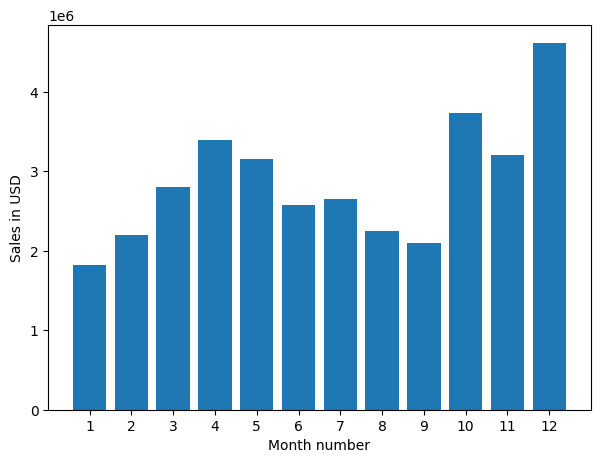

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
months = range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month number')
plt.show()


What city had highest number of sales?



In [23]:
result_2 = df.groupby('City').sum(['Sales'])
result_2


,Quantity Ordered,Price Each,Sales,Month
City,,,,
Atlanta GA,16602.0,2779908.20,2795498.58,104794
Austin TX,11153.0,1809873.61,1819581.75,69829
Boston MA,22528.0,3637409.77,3661642.01,141112
Dallas TX,16730.0,2752627.82,2767975.40,104620
Los Angeles CA,33289.0,5421435.23,5452570.80,208325
New York City NY,27932.0,4635370.83,4664317.43,175741
Portland ME,2750.0,447189.25,449758.27,17144
Portland OR,11303.0,1860558.22,1870732.34,70621
San Francisco CA,50239.0,8211461.74,8262203.91,315520


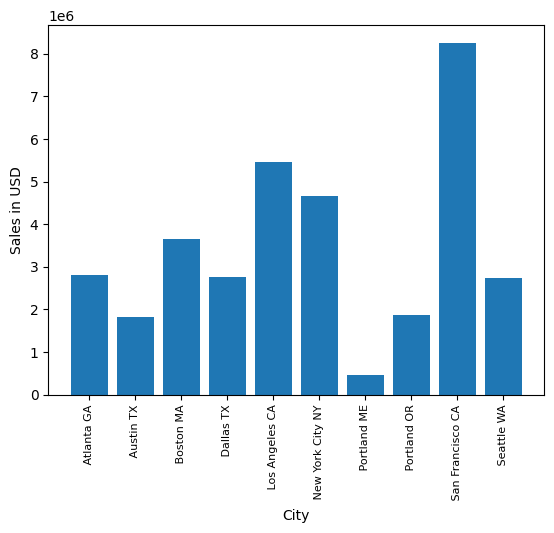

In [24]:
Cities= df['City'].unique()
Cities = [city for city, df in df.groupby('City')]

plt.bar(Cities,result_2['Sales'])
plt.xticks(Cities,rotation ='vertical',fontsize=8)
plt.ylabel('Sales in USD')
plt.xlabel('City')
plt.show()

What time should we display advertisements to maximize the likelihood of purchases?

In [25]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",700.00,1,Boston MA
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",14.95,1,Portland OR
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",23.98,1,San Francisco CA
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",149.99,1,Los Angeles CA
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",11.99,1,Austin TX


In [26]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

<ipython-input-26-f5779b1b9e1a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [30]:
# Add hour column
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df['Count'] = 1
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour,Minute,Count
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,1,Boston MA,21,25,1
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,1,Portland OR,14,15,1
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,1,San Francisco CA,13,33,1
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,1,Los Angeles CA,20,33,1
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,1,Austin TX,11,59,1


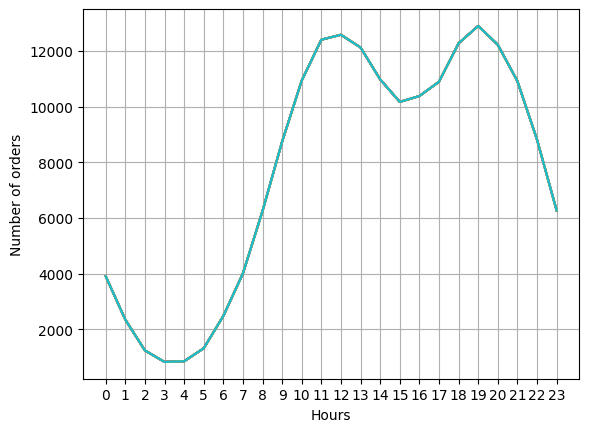

In [28]:
hours = [hour for hour , df in df.groupby('Hour')]

plt.plot(hours,df.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of orders')
plt.grid()

# The peak time to advertise would be around 11am or between 6pm and 8pm


What products are most often sold together?

In [32]:
df = df[df['Order ID'].duplicated(keep= False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2.head()


<ipython-input-32-676afe9d45fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


In [33]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 2140),
 (('Google Phone', 'USB-C Charging Cable'), 2116),
 (('iPhone', 'Wired Headphones'), 987),
 (('Google Phone', 'Wired Headphones'), 949),
 (('iPhone', 'Apple Airpods Headphones'), 799),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 773),
 (('Google Phone', 'Bose SoundSport Headphones'), 503),
 (('USB-C Charging Cable', 'Wired Headphones'), 452),
 (('Vareebadd Phone', 'Wired Headphones'), 327),
 (('Lightning Charging Cable', 'Wired Headphones'), 253)]

Question 5 : What product sold the most ? Why did it sold the most?

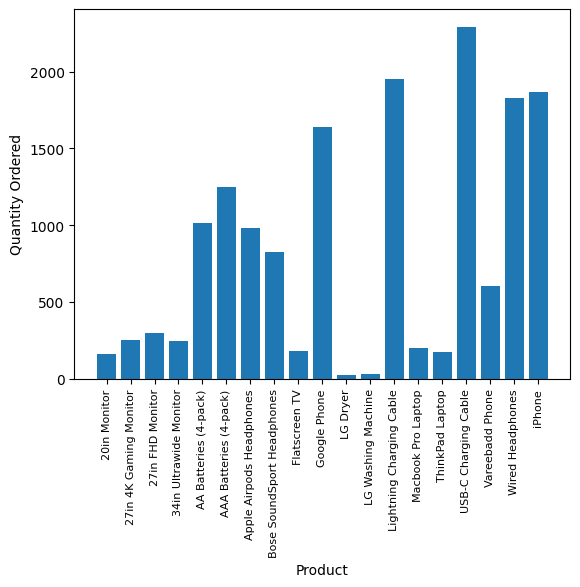

In [34]:
product_group = df.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()

products = [product for product, df in product_group]
plt.bar(products,quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products,rotation ='vertical',fontsize=8)
plt.show()

<ipython-input-35-959b694db4bc>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical', size=8)


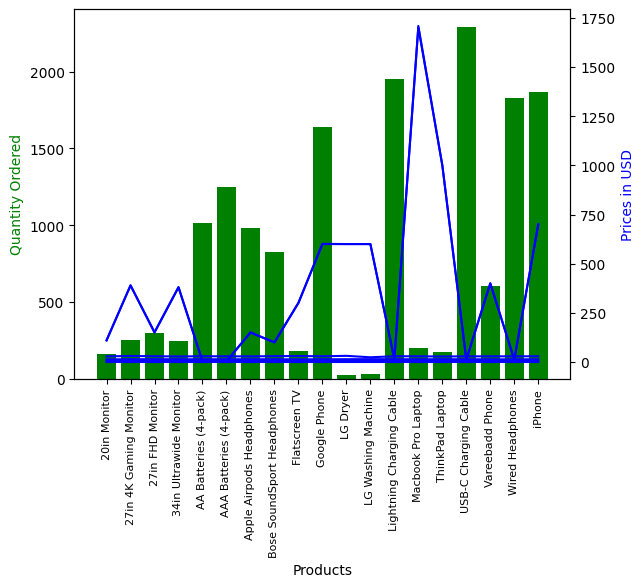

In [35]:
prices = df.groupby('Product').mean(['Price Each'])

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered,color ='g')
ax2.plot(products, prices, color ='b')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Prices in USD', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

